In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

In [2]:
import sys

sys.path.append("../tools/")
from dust_extinction import calALambda
from data_binning import data_binning
from visual import rcparams_format

rcparams_format(mpl.rcParams)

color_map = {
    "green1": "#66c2a5",
    "orange": "#fc8d62",
    "blue": "#8da0cb",
    "pink": "#e78ac3",
    "green2": "#a6d854",
    "yellow": "#ffd92f",
    "brown": "#e5c494",
    "grey": "#b3b3b3",
}

In [3]:
import glob
import os
import sys
sys.path.append('../tools/')

from dust_extinction import calALambda
from spec_to_flux import spec_to_flux, spec_to_mag
from data_binning import data_binning
from visual import rcparams_format

rcparams_format(mpl.rcParams)

In [4]:
with open('CSP_spec_phot.ascii') as f:
    lines = f.readlines()

In [5]:
SN_names = np.empty(133, dtype='object')
v_Si, EW_Si_5972, EW_Si_6355, M_B_max = np.empty(
    133), np.empty(133), np.empty(133), np.empty(133)
v_Si_unc, EW_Si_5972_unc, EW_Si_6355_unc, M_B_max_unc = np.empty(
    133), np.empty(133), np.empty(133), np.empty(133)
sample = np.empty(133, dtype='object')

k = 0
for l in lines[6:-1]:
    info = l.split('\t')
    try:
        v_Si[k] = float(info[2].split()[0])
        v_Si_unc[k] = float(info[2].split()[-1])
        EW_Si_5972[k] = float(info[3].split()[0])
        EW_Si_5972_unc[k] = float(info[3].split()[-1])
        EW_Si_6355[k] = float(info[4].split()[0])
        EW_Si_6355_unc[k] = float(info[4].split()[-1])
        M_B_max[k] = float(info[5].split()[0])
        M_B_max_unc[k] = float(info[5].split()[-1])
        SN_names[k] = info[0]
    except IndexError:
        continue
    if info[6] == 'cdots':
        sample[k] = 'Zheng+2018'
    else:
        sample[k] = 'CSP'
    
    k += 1


In [85]:
z = 0.02736
z_unc = 0.00007
M_B_max_joj = -19.6315

C = 299792.458

# 22joj
v_Si_joj = 10278.512
v_Si_joj_unc = 131.228
beta = v_Si_joj / C

EW_Si_6355_joj, EW_Si_6355_unc_joj = 27.801, 1.271
EW_Si_5972_joj, EW_Si_5972_unc_joj = 2.928, [[2.928-1.239], [3.721-2.928]]  

# 18aoz
M_B_max_aoz = -19.32
EW_Si_6355_aoz = 106.4
EW_Si_5972_aoz = 20.22
v_Si_aoz, v_Si_aoz_unc = 11400, 100

# 91T, 00cx

In [361]:
CSP_idx = sample == "CSP"
SS_idx = (EW_Si_5972 < 25) & (EW_Si_6355 < 75)
dict_joj = dict(
    zorder=99, marker="*", s=1200, facecolor="w", color=color_map["orange"], lw=3
)
dict_aoz = dict(
    zorder=99, marker="d", s=400, facecolor="w", color=color_map["yellow"], lw=3
)
dict_CSP = dict(
    fmt="o",
    # capsize=3,
    label="CSP",
    elinewidth=0.5,
    # markerfacecolor="w",
    ms=6,
    mew=0,
    mec="0.6",
    color="0.8",
    # alpha=0.35,
    zorder=-100,
)
dict_Zheng = dict_CSP
# dict_Zheng = dict(
#     fmt="o",
#     # capsize=3,
#     label="Zheng et al.",
#     elinewidth=0.5,
#     # markerfacecolor="w",
#     ms=6,
#     mew=1,
#     mec="0.5",
#     color="0.7",
#     # alpha=0.35,
#     zorder=-100,
# )

dict_SS = dict(
    color=color_map["blue"],
    alpha=1,
    capsize=3,
    fmt="s",
    zorder=-100,
    ms=6,
    mec="tab:blue",
)

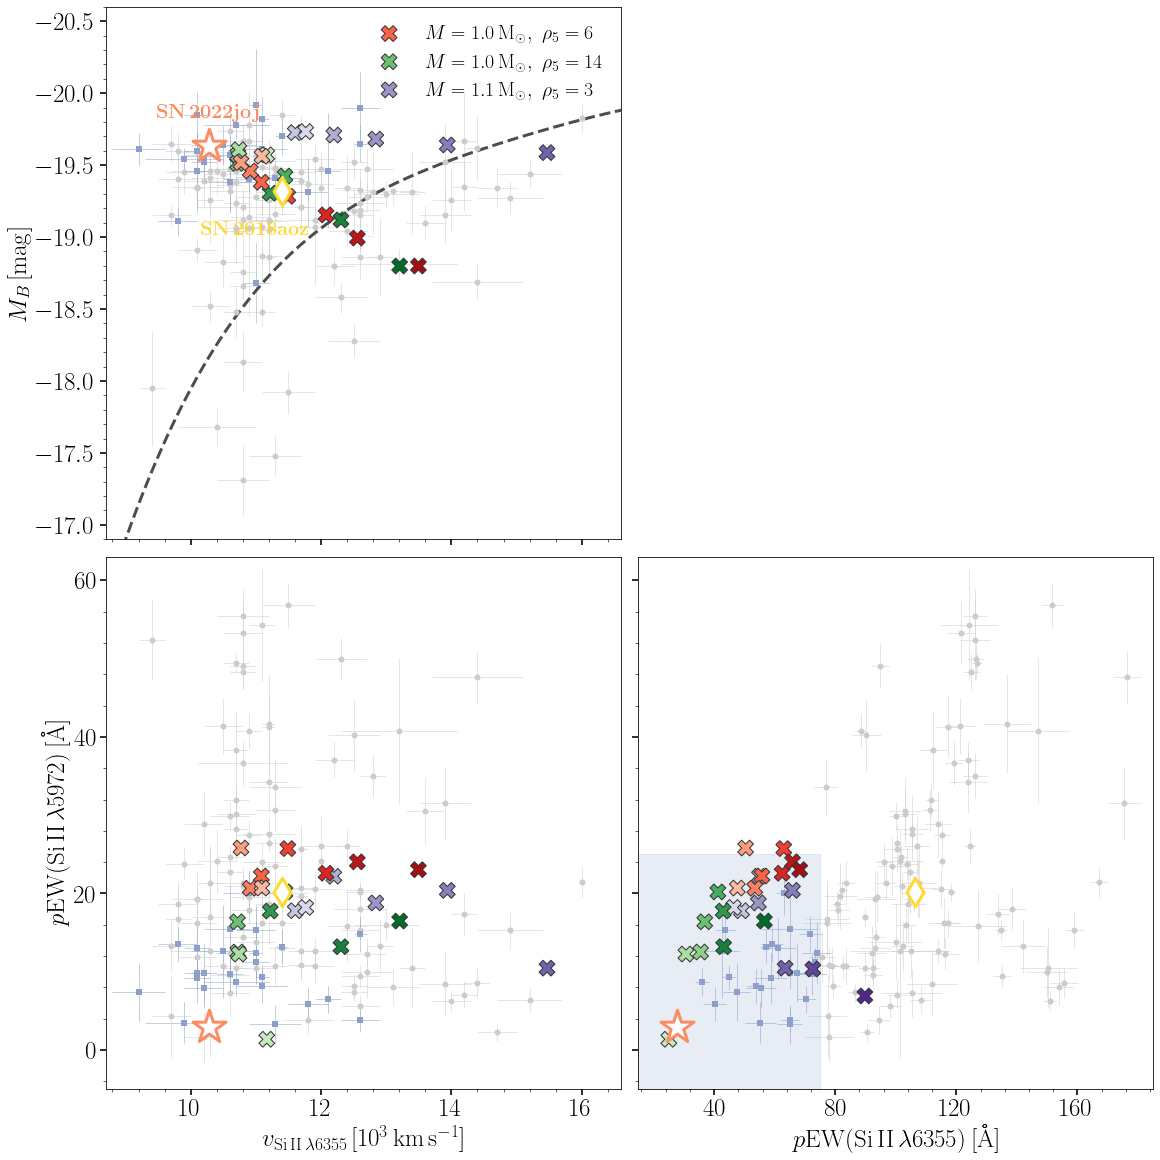

In [389]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16), sharex="col", sharey="row", constrained_layout=True)
ax = ax.ravel()
fig.delaxes(ax[1])

# Shen+2021 2d model
Shen_model = np.loadtxt("./Shen+21_model/1.1Msun_spec_para.dat")
dens_Shen = [6e5, 14e5, 3e5]
markers_Shen = ["X", "X", "X"]
cmaps_Shen = ["Reds", "Greens", "Purples"]
for k, dens in enumerate(dens_Shen):
    idx = Shen_model[:, 2] == dens
    m = Shen_model[idx, 0]
    mu = Shen_model[idx, 1]
    M_B_max_Shen = Shen_model[idx, 3]
    v_Si_Shen = -Shen_model[idx, 4] / 1e3
    EW_Si_5972_Shen = Shen_model[idx, 6]
    EW_Si_6355_Shen = Shen_model[idx, 8]
    dict_Shen = dict(
        marker=markers_Shen[k],
        zorder=(5 - k) * 10,
        s=250,
        c=mu,
        vmin=-1.7,
        vmax=1.3,
        cmap=cmaps_Shen[k],
        lw=1,
        edgecolor=".2",
        label=f"$M = {m[0]}\,"
        + r"\mathrm{M_\odot},\ "
        + r"\rho_5 = {:.0f}$".format(dens / 1e5),
    )
    ax[0].scatter(v_Si_Shen, M_B_max_Shen, **dict_Shen)
    ax[2].scatter(v_Si_Shen, EW_Si_5972_Shen, **dict_Shen)
    ax[3].scatter(EW_Si_6355_Shen, EW_Si_5972_Shen, **dict_Shen)
ax[0].legend(prop={"size": 20}, frameon=False)

# background
para_x, para_x_unc = [v_Si, v_Si, EW_Si_6355], [v_Si_unc, v_Si_unc, EW_Si_6355_unc]
para_y, para_y_unc = [M_B_max, EW_Si_5972, EW_Si_5972], [
    M_B_max_unc,
    EW_Si_5972_unc,
    EW_Si_5972_unc,
]
ax_idx = [0, 2, 3]

for x, x_unc, y, y_unc, idx in zip(para_x, para_x_unc, para_y, para_y_unc, ax_idx):
    ax[idx].errorbar(
        x[CSP_idx & ~SS_idx],
        y[CSP_idx & ~SS_idx],
        xerr=x_unc[CSP_idx & ~SS_idx],
        yerr=y_unc[CSP_idx & ~SS_idx],
        **dict_CSP,
    )
    ax[idx].errorbar(
        x[~CSP_idx & ~SS_idx],
        y[~CSP_idx & ~SS_idx],
        xerr=x_unc[~CSP_idx & ~SS_idx],
        yerr=y_unc[~CSP_idx & ~SS_idx],
        **dict_Zheng,
    )
    ax[idx].errorbar(
        x[CSP_idx & SS_idx],
        y[CSP_idx & SS_idx],
        xerr=x_unc[CSP_idx & SS_idx],
        yerr=y_unc[CSP_idx & SS_idx],
        **(dict_CSP | dict_SS),
    )
    ax[idx].errorbar(
        x[~CSP_idx & SS_idx],
        y[~CSP_idx & SS_idx],
        xerr=x_unc[~CSP_idx & SS_idx],
        yerr=y_unc[~CSP_idx & SS_idx],
        **(dict_Zheng | dict_SS),
    )

# M_B_max v.s. v Si ii 6355
ax[0].invert_yaxis()
ax[0].set_ylabel(r"$M_B\,[\mathrm{mag}]$")

ax[0].scatter(v_Si_joj / 1e3, y=M_B_max_joj, **dict_joj)
ax[0].text(
    v_Si_joj / 1e3,
    M_B_max_joj - 0.2,
    r"$\mathbf{SN\,2022joj}$",
    color=color_map["orange"],
    ha="center",
    fontsize=20,
)
ax[0].scatter(v_Si_aoz / 1e3, y=M_B_max_aoz, **dict_aoz)
ax[0].text(
    v_Si_aoz / 1e3 - 0.4,
    M_B_max_aoz + 0.3,
    r"$\mathbf{SN\,2018aoz}$",
    color=color_map["yellow"],
    ha="center",
    fontsize=20,
)

ax[0].xaxis.set_major_locator(MultipleLocator(2))
ax[0].xaxis.set_minor_locator(MultipleLocator(0.4))
ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))


def spline_fit(x):
    y = (
        1.01504474e-03 * x**4
        - 6.21238194e-02 * x**3
        + 1.43574046e00 * x**2
        - 1.49804784e01 * x
        + 4.02595368e01
    )
    return y


polin_model_vel = np.linspace(8.8, 18, 1000)
polin_model_MB = spline_fit(polin_model_vel)

ax[0].plot(
    polin_model_vel, polin_model_MB, lw=3, color=".3", zorder=-100, linestyle="--"
)

# EW Si ii 6355 v.s. v Si ii 6355
ax[2].scatter(v_Si_joj / 1e3, EW_Si_5972_joj, **dict_joj)
ax[2].scatter(v_Si_aoz / 1e3, EW_Si_5972_aoz, **dict_aoz)

ax[2].set_xlabel(
    r"$v_{\mathrm{Si\,II}\,\lambda 6355}\,[10^3\,\mathrm{km}\,\mathrm{s}^{-1}]$"
)
ax[2].set_ylabel(r"$p\mathrm{EW}(\mathrm{Si\,II}\,\lambda 5972)\,[\mathrm{\r{A}}]$")

ax[2].yaxis.set_major_locator(MultipleLocator(20))
ax[2].yaxis.set_minor_locator(MultipleLocator(4))

# EW Si ii 6355 v.s. v Si ii 5972

ax[3].scatter(EW_Si_6355_joj, EW_Si_5972_joj, **dict_joj)
ax[3].scatter(EW_Si_6355_aoz, EW_Si_5972_aoz, **dict_aoz)

ax[3].set_xlabel(r"$p\mathrm{EW}(\mathrm{Si\,II}\,\lambda 6355)\,[\mathrm{\r{A}}]$")
ax[3].xaxis.set_major_locator(MultipleLocator(40))
ax[3].xaxis.set_minor_locator(MultipleLocator(8))

# ax[3].plot([75, 75, -10], [-10, 25, 25], color=color_map["blue"], ls="-.", lw=3)
ax[3].fill_between([75, -10], [-10, -10], [25, 25], color=color_map["blue"], alpha=.2)

ax[0].set_ylim(-16.9, -20.6)
ax[2].set_xlim(8.7, 16.6)
ax[2].set_ylim(-5, 63)
ax[3].set_xlim(15, 185)

plt.savefig("../paper/figures/phase_space.pdf", bbox_inches="tight")

In [154]:
PTF_sample = pd.read_csv('./PTF_SN_lines.csv', sep='|', comment='#')
v = PTF_sample.SN.value_counts()
multiple_obs = PTF_sample[PTF_sample.SN.isin(v.index[v.gt(0)])]
SN_list = set(multiple_obs['SN'])

In [155]:
phases_joj = [-12.49, 2.16, 8.65]
EWs_Si_6355_joj = [47.389, 28.055, 48.504]
EWs_Si_6355_unc_joj = [2.478, 1.263, 0.581]

PTF10hmv  [-14.1   4.9] [41.9 59.7]
PTF10xyt  [-10.8  -8.8  -4.8] [61.4 63.4 72.8]
PTF10qjq  [-10.7  -2.7   0.3   3.3] [34.6 56.3 69.3 63.8]
PTF10qky  [-10.3   0.7] [55.6 77. ]
PTF10icb  [-11.6  -5.6   4.4] [78.7 79.4 99.1]
PTF09dlc  [-10.8  -5.8  -3.8  -2.8  -0.8] [96.9 63.2 57.2 62.9 82.8]


<ErrorbarContainer object of 3 artists>

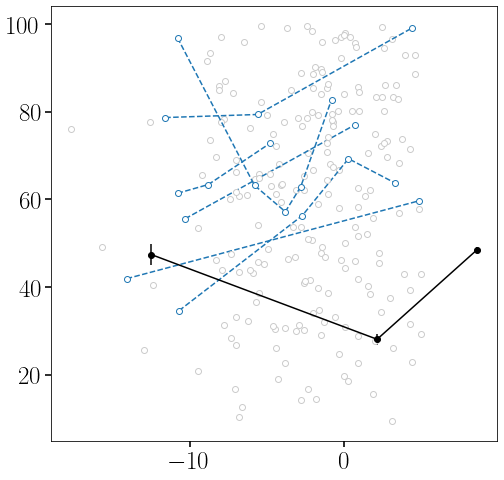

In [156]:
plt.figure(figsize=(8, 8))
for SN in SN_list:
    target = multiple_obs[multiple_obs['SN'] == SN]
    if (target['W5355'].max() > 100): continue
    if (target['Phase'].min() > -10) or (target['Phase'].max() < -5) or len(target) == 1:
        # pass
        plt.errorbar(target['Phase'], target['W5355'], fmt='o', color='0.8', markerfacecolor='w')
    else:
        plt.errorbar(target['Phase'], target['W5355'], marker='o', color='tab:blue', linestyle='--', markerfacecolor='w')
        print(SN, target['Phase'].values, target['W5355'].values)

plt.errorbar(phases_joj, EWs_Si_6355_joj, yerr=EWs_Si_6355_unc_joj, marker='o', color='k')

1990N
1998es
2003kf
2005cg
2006gr
2007F


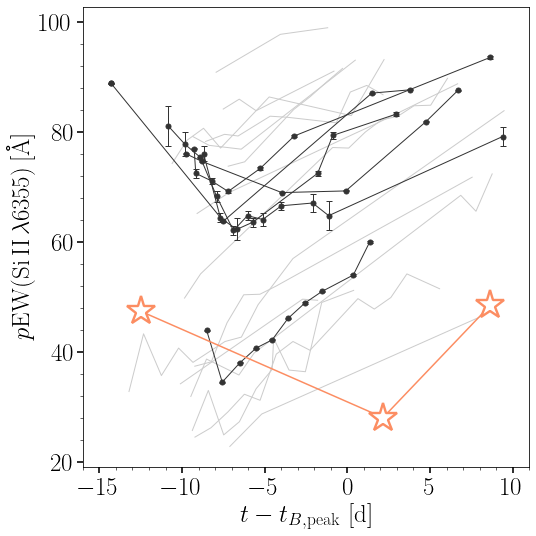

In [290]:
fig, ax = plt.subplots(figsize=(8, 8))
with open("./apj406856t2_mrt.txt") as f:
    lines = np.array([l[:36].split() for l in f.readlines()[70:]])
targets = sorted([*set(lines[:, 0])])
for target in targets:
    idx = (lines[:, 0] == target) & (np.array(lines[:, 1], dtype=float) < 10)
    phase = np.array(lines[idx, 1], dtype=float)
    EW = np.array(lines[idx, 4], dtype=float)
    EW_err = np.array(lines[idx, 5], dtype=float)
    if len(phase) <= 1:
        continue
    if (phase[0] > -7) or (EW.max() > 100):
        continue

    if EW[0] > EW.min() + 5:
        print(target)
        dict_sample = dict(
            yerr=EW_err, marker="o", capsize=3, ms=5, color=".2", lw=1, zorder=10
        )
    else:
        dict_sample = dict(color=".8", lw=1)
    ax.errorbar(phase, EW, **dict_sample)

ax.set_xlim(-16, 11)
ax.set_xlabel(r"$t-t_{B,\mathrm{peak}}\ [\mathrm{d}]$")
ax.set_ylabel(r"$p\mathrm{EW}(\mathrm{Si\,II}\,\lambda 6355)\,[\mathrm{\r{A}}]$")
ax.errorbar(
    phases_joj,
    EWs_Si_6355_joj,
    marker="*",
    ms=30,
    color=color_map["orange"],
    mew=2.4,
    markerfacecolor="w",
    zorder=20,
)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(4))
fig.tight_layout()
# plt.savefig('../paper/figures/phase_space_2.pdf', bbox_inches='tight')